# 課題2：住宅価格の回帰モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なライブラリの読み込み

In [23]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [24]:
# データを変数datasetに読み込む
dataset_base = pd.read_csv("./iowa_ames_housing_price.csv")


In [25]:
# データの最初の5行を表示
dataset_base.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [26]:
# 要約統計量を表示
dataset_base.describe()

,Order,area,price,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,1515.463699,180921.195890,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,525.480383,79442.502883,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,334.000000,34900.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,1129.500000,129975.000000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,1464.000000,163000.000000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,1776.750000,214000.000000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,5642.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 3. 目的変数と説明変数の選択

ここでは、以下の列を使用します。

- 目的変数： `price`
- 説明変数： `OverallQual`, `area`, `X2ndFlrSF`, `BsmtFinSF1`,  `OverallCond`

In [27]:
# 目的変数の列名（変更しないでください）
target_col = 'price'

# 説明変数の列名（変更しないでください）
feature_cols = ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [28]:
# target_col と feature_cols を使用して dataset より目的変数と説明変数に該当する列を取得し、
# numpy 配列に変換したものを変数 Y と X に格納する

# Y:目的変数に該当する列
Y = np.array(dataset_base['price'])

# X:説明変数に該当する列
X = np.array(dataset_base[ ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']])

# 形状を確認
print("Y=", Y.shape, ", X4=", X.shape)


Y= (1460,) , X4= (1460, 5)


## 4. データの分割

この課題では、ホールドアウト法でデータを分割します。

In [29]:
# X と Y を 機械学習用データとテストデータに7:3で分ける(X_train, X_test, Y_train, Y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [30]:
# 機械学習用データを、学習データと検証データに7:3で分ける(X_train, X_valid, Y_train, Y_valid)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# 形状を確認
print("X_train=", X_train.shape, ", X_valid=", X_valid.shape, ", X_test=", X_test.shape, ", Y_train=", Y_train.shape, ", Y_valid=", Y_valid.shape, ", Y_test=", Y_test.shape)

X_train= (715, 5) , X_valid= (307, 5) , X_test= (438, 5) , Y_train= (715,) , Y_valid= (307,) , Y_test= (438,)


## 5. モデルの作成から評価まで

線形回帰モデルと、回帰木、ランダムフォレストの3つのモデルを作成して比較します。それぞれのモデルで以下を行います。
- モデルの作成
- 学習データによる学習
- 検証データによる予測
- MSEの算出

In [31]:
# 線形回帰モデルを作成し、学習・予測を実施して、MSEを算出する
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, Y_train)
Y_pred = LinearRegression_model.predict(X_valid)

LinearRegression_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(多重線形回帰モデル):', LinearRegression_model_mse)

MSE(多重線形回帰モデル): 1670916761.2011976


priceのmeanは180921.195890。1670916761の平方根は40876.8。

In [32]:
# 回帰木のモデルを作成し、学習・予測を実施して、MSEを算出する
DecisionTreeRegressor_model = DecisionTreeRegressor()
DecisionTreeRegressor_model.fit(X_train, Y_train)
Y_pred = DecisionTreeRegressor_model.predict(X_valid)

DecisionTreeRegressor_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(回帰木モデル):', DecisionTreeRegressor_model_mse)

MSE(回帰木モデル): 2397631539.2443


priceのmeanは180921.195890。2790795360の平方根は52827.9。

In [34]:
# ランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する
RandomForestRegressor_model = RandomForestRegressor(n_estimators=100, random_state=0)
RandomForestRegressor_model.fit(X_train, Y_train)
Y_pred = RandomForestRegressor_model.predict(X_valid)

RandomForestRegressor_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(ランダムフォレストモデル):', RandomForestRegressor_model_mse)

MSE(ランダムフォレストモデル): 1529304828.127005


priceのmeanは180921.195890。1529304828の平方根は39106.3。

## 6. テストデータによる汎化性能の確認

3つの中でもっともMSEの値が良かったモデルについて、テストデータで汎化性能を確認しましょう。

In [40]:
#ランダムフォレストのチューニング
from sklearn.model_selection import GridSearchCV
tuning_model = RandomForestRegressor(random_state=0)

# パラメータ:n_estimators:木の数、max_depth:木の深さ
tuning_params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

# グリッドサーチの設定
# cv:交差検証の回数, scoring:目的変数
# 注意:scikit-learnのバージョンが、0.17の場合は、scoring='mean_squared_error' を指定する
gscv = GridSearchCV(tuning_model, param_grid=tuning_params, cv=3, scoring='neg_mean_squared_error')

X2 = np.array(dataset_base[ ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']])
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)

gscv.fit(X_train, Y_train)

print("GridSearchCV best score = ", gscv.best_score_)
print("GridSearchCV best parameter = ", gscv.best_params_)




# 以上の結果に従ってパラメータを変えてランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する
#RandomForestRegressor_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0)
RandomForestRegressor_model = RandomForestRegressor(**gscv.best_params_, random_state=0)  #上行のものと同じ結果
RandomForestRegressor_model.fit(X_train, Y_train)
Y_pred = RandomForestRegressor_model.predict(X_valid)

RandomForestRegressor_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(ランダムフォレストモデル):', RandomForestRegressor_model_mse)

# テストデータを使って予測を行いMSEを算出
Y_pred2 = RandomForestRegressor_model.predict(X_test)
RondomForestRegressor_model_mse2 = mean_squared_error(Y_test, Y_pred2)
print('MSE2(ランダムフォレストテスト):', RondomForestRegressor_model_mse2)


GridSearchCV best score =  -1061339646.2192293
GridSearchCV best parameter =  {'max_depth': 10, 'n_estimators': 50}
MSE(ランダムフォレストモデル): 244399024.81390217
MSE2(ランダムフォレストテスト): 1110699396.3779752


priceのmeanは180921.195890。1061339646の平方根は32578.2。244399024の平方根は15633.2→これまでで最高。

1110699396の平方根は33327.1。

## 7. グラフによる確認

説明変数が多い場合、「説明変数で目的変数を正しく予測できているか」を可視化することは困難です。そこで「正解と予測値」とを比較することで、予測の精度を可視化してみましょう。

### 散布図による可視化

X軸(横方向)に `テストデータの正解の値` 、Y軸(縦方向)に `予測値` を使って散布図を作成してみましょう。全体的に右肩上がりで、直線上にデータが並んでいれば、予測が行なえていると判断できます。

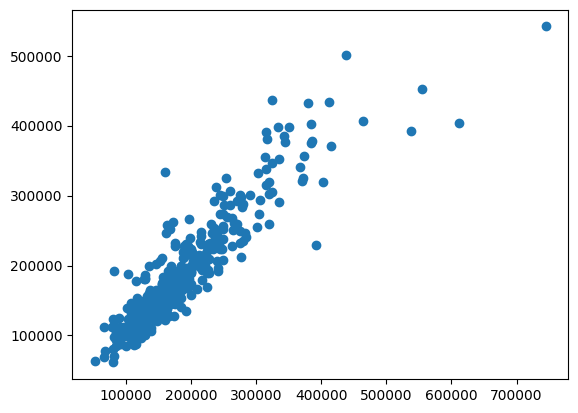

In [43]:
# X軸:正解の値、Y軸:予測値で散布図を作成

plt.scatter(Y_test, Y_pred2)


### ヒストグラムによる可視化

「誤差率＝正解の値と予測値との差の割合」をヒストグラムで確認してみましょう。誤差率は以下で計算できます。

`（正解の値－予測値）/ 正解の値`

併せて、誤差率の平均値、標準偏差も出力しましょう。平均値は `numpy` の `mean` 関数、標準偏差は `std` 関数で取得できます。

なお、ヒストグラムを描く際は`matplotlib.pyplot`の`hist`関数が使えます。matplotlib.pyplotはpltという名前をつけているはずなので、ヒストグラム化したいデータを`plt.hist()`の引数に渡すことでヒストグラムを描画できます。

誤差率の平均値:  -0.024344771851801027
誤差率の標準偏差:  0.17743947832178406


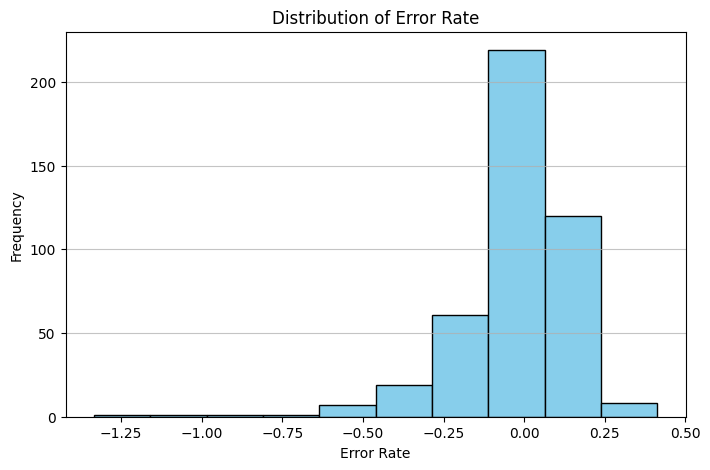

In [54]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
error_rate = (Y_test - Y_pred2) / Y_test

error_rate

plt.figure(figsize=(8, 5))
plt.hist(error_rate, bins=10, color='skyblue', edgecolor='black')

# ヒストグラムの装飾
plt.title('Distribution of Error Rate')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)


# 平均値
mean_error_rate = np.mean(error_rate)
print("誤差率の平均値: ", mean_error_rate)

# 標準偏差
std_error_rate = np.std(error_rate)
print("誤差率の標準偏差: ", std_error_rate)